In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.io import loadmat
from pathlib import Path
import ants


In [3]:
atlas_reg_path = '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat'
atlas_reg = loadmat(atlas_reg_path)
# inv_atlas_reg = loadmat('example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c_inv.mat')
# atlas_reg, inv_atlas_reg

In [4]:

t1c_flair_coreg_path = Path('/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat')
t1c_flair_coreg = loadmat(t1c_flair_coreg_path)
# inv_t1c_flair_coreg = loadmat('example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair_inv.mat')
# t1c_flair_coreg, inv_t1c_flair_coreg

In [5]:
atlas_img_path = Path('/home/marcelrosier/preprocessing/brainles_preprocessing/registration/atlases/atlases_v1.0.0/brats_sri24.nii')
t1c_img_path = Path('/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/AX_T1_POST_GD_FLAIR_TCGA-DU-7294_TCGA-DU-7294_GE_TCGA-DU-7294_AX_T1_POST_GD_FLAIR_RM_13_t1c.nii.gz')
flair_img_path = Path('/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/AXIAL_FLAIR_RF2_150_TCGA-DU-7294_TCGA-DU-7294_GE_TCGA-DU-7294_AXIAL_FLAIR_RF2_150_IR_7_fla.nii.gz')

assert atlas_img_path.exists(), f'Atlas path {atlas_img_path} does not exist.'
assert t1c_img_path.exists(), f'T1c image path {t1c_img_path} does not exist.'
assert flair_img_path.exists(), f'Flair image path {flair_img_path} does not exist.'

atlas_img = ants.image_read(str(atlas_img_path))
t1c_img = ants.image_read(str(t1c_img_path))
flair_img = ants.image_read(str(flair_img_path))

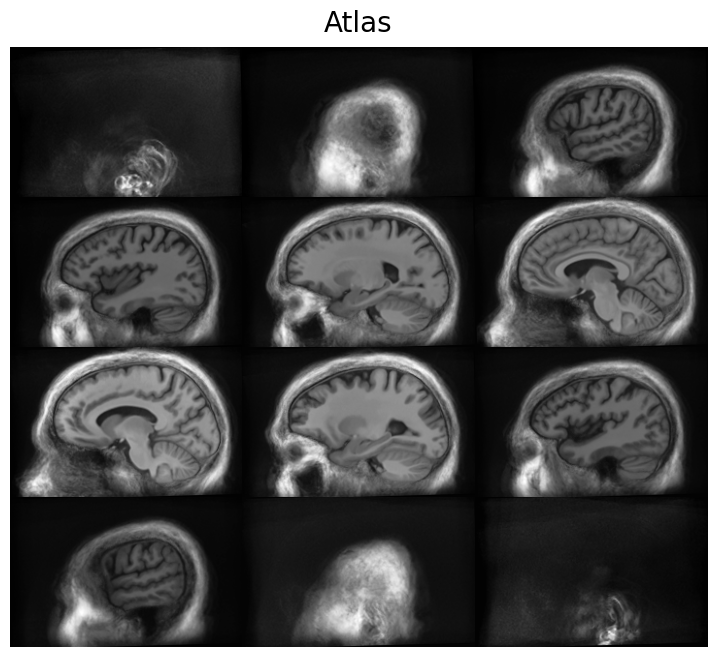

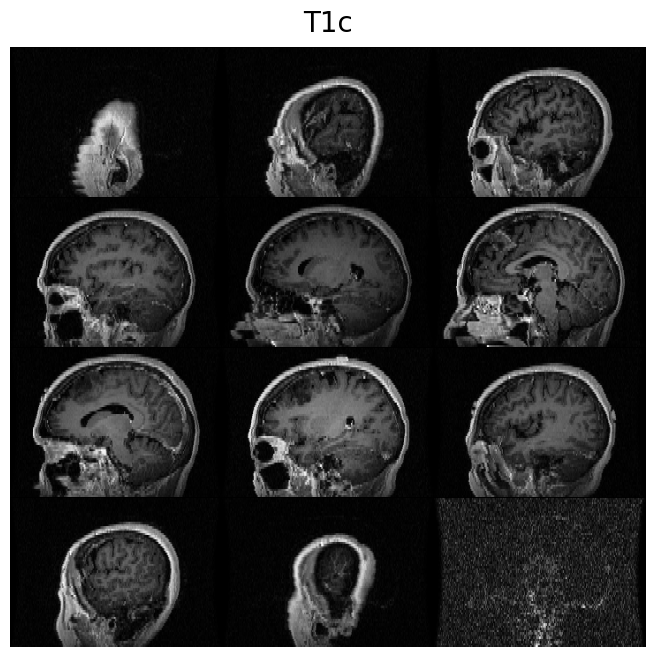

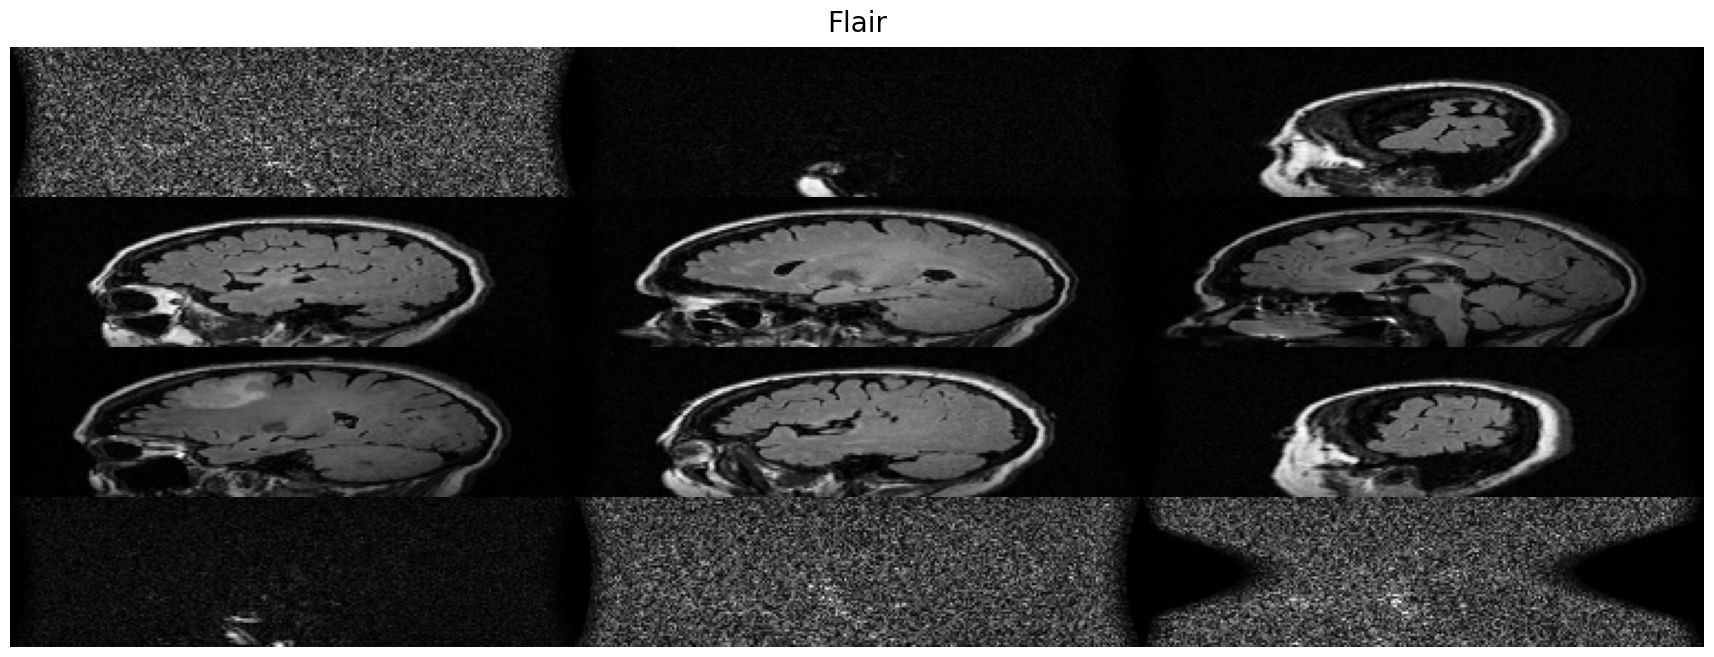

In [11]:
for img_path,title in zip([atlas_img_path, t1c_img_path, flair_img_path],["Atlas", "T1c", "Flair"]):
    ants.plot(ants.image_read(str(img_path)), title=title)

In [6]:
t1c_flair_coreg_path.exists()

True

['-d', '3', '-i', '0x18115100', '-o', '0x1e04a950', '-r', '0x20827c0', '-n', 'linear', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat']
Using single precision for computations.
Input scalar image: 0x18115100
Reference image: 0x20827c0
The composite transform comprises the following transforms (in order): 
  1. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x1e04a950


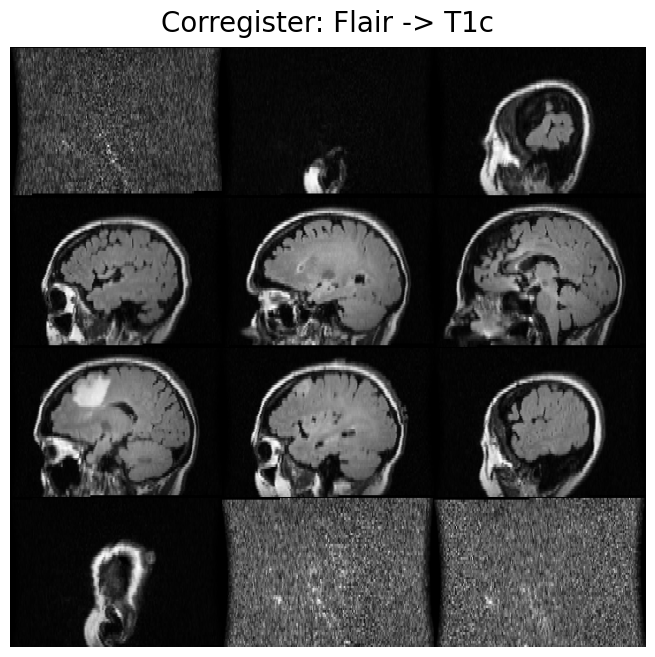

In [17]:
coreg_img = ants.apply_transforms(
    fixed=t1c_img,
    moving=flair_img,
    transformlist=['/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat'],
    verbose=True,
    # **default_kwargs
)

ants.plot(coreg_img, title='Corregister: Flair -> T1c')

['-d', '3', '-i', '0x18b9c920', '-o', '0x18492ee0', '-r', '0x170d8be0', '-n', 'linear', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat']
Using single precision for computations.
Input scalar image: 0x18b9c920
Reference image: 0x170d8be0
The composite transform comprises the following transforms (in order): 
  1. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x18492ee0


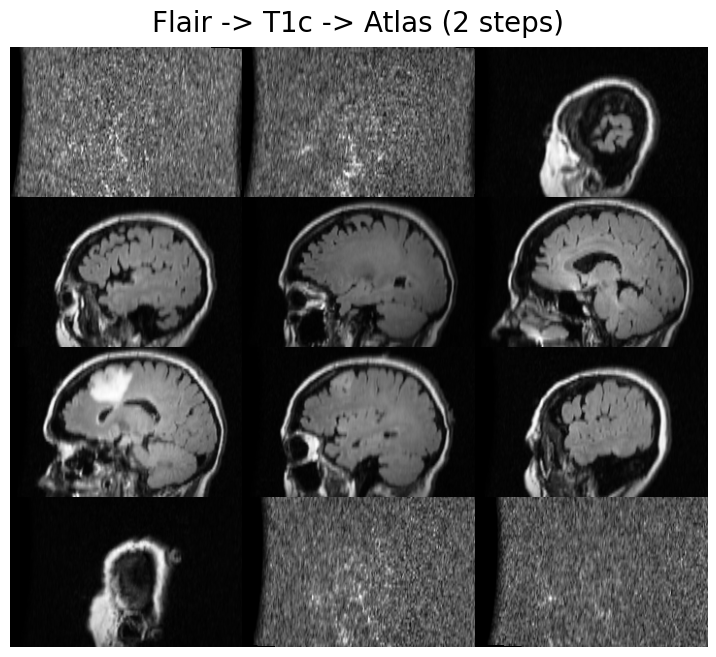

In [18]:
atlas_after_coreg_img = ants.apply_transforms(
    fixed=atlas_img,
    moving=coreg_img,
    transformlist=[atlas_reg_path],
    verbose=True,
)
ants.plot(atlas_after_coreg_img, title='Flair -> T1c -> Atlas (2 steps)')

['-d', '3', '-i', '0x17708360', '-o', '0x178d7310', '-r', '0x16f6e980', '-n', 'linear', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat', '-t', '/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat']
Using single precision for computations.
Input scalar image: 0x17708360
Reference image: 0x16f6e980
The composite transform comprises the following transforms (in order): 
  1. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat (type = AffineTransform)
  2. /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x178d7310


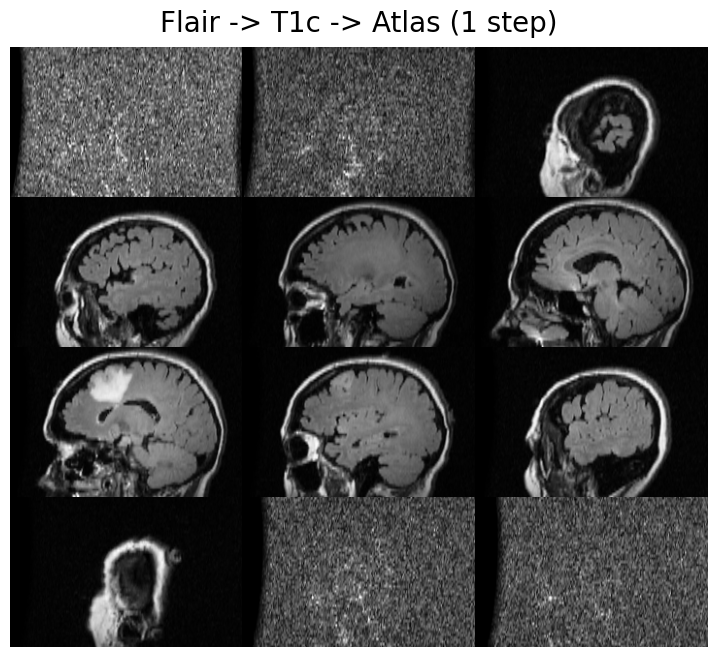

In [12]:
# single step registration
atlas_after_coreg_img_single_step = ants.apply_transforms(
    fixed=atlas_img,
    moving=flair_img,
    transformlist=[str(atlas_reg_path), str(t1c_flair_coreg_path)], # transforms are applied in inverse order!!!!
    verbose=True,
)
ants.plot(atlas_after_coreg_img_single_step, title='Flair -> T1c -> Atlas (1 step)')

['-d', '3', '-i', '0x16b68590', '-o', '0x183b92d0', '-r', '0x17259b80', '-n', 'linear', '-t', '[/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat,1]', '-t', '[/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat,1]']
Using single precision for computations.
Input scalar image: 0x16b68590
Reference image: 0x17259b80
The composite transform comprises the following transforms (in order): 
  1. inverse of /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat (type = AffineTransform)
  2. inverse of /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x183b92d0


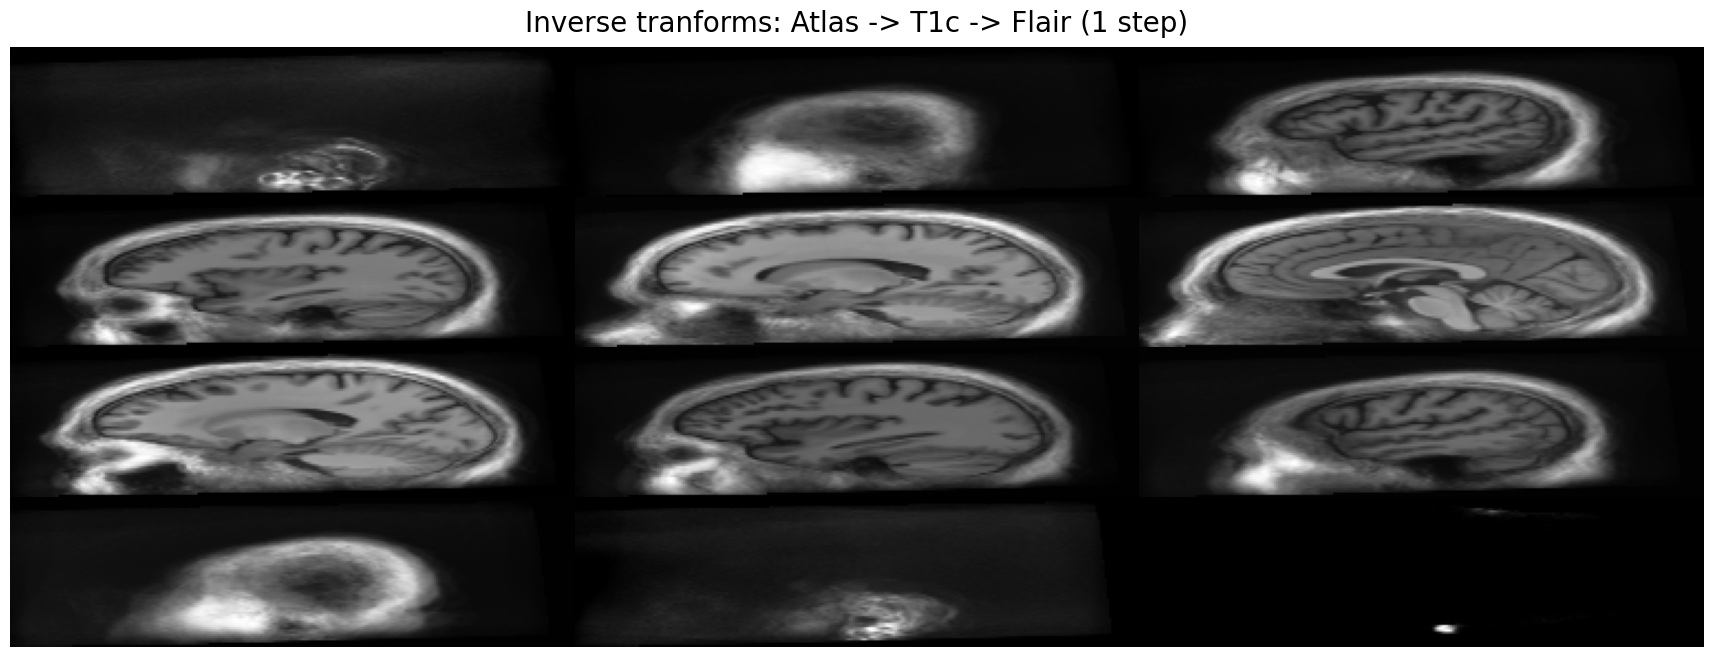

In [15]:
# single step registration
back_to_native_img_A = ants.apply_transforms(
    fixed=flair_img,
    moving=atlas_img,
    transformlist=[
        str(t1c_flair_coreg_path),
        str(atlas_reg_path),
    ],  # transforms are applied in inverse order!!!!
    whichtoinvert=[True, True],
    verbose=True,
)
ants.plot(back_to_native_img_A, title="Inverse tranforms: Atlas -> T1c -> Flair (1 step)")

['-d', '3', '-i', '0x169e9b30', '-o', '0x165fc3a0', '-r', '0x1e014500', '-n', 'linear', '-t', '[/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat,1]']
Using single precision for computations.
Input scalar image: 0x169e9b30
Reference image: 0x1e014500
The composite transform comprises the following transforms (in order): 
  1. inverse of /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/atlas-registration/atlas__t1c.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x165fc3a0


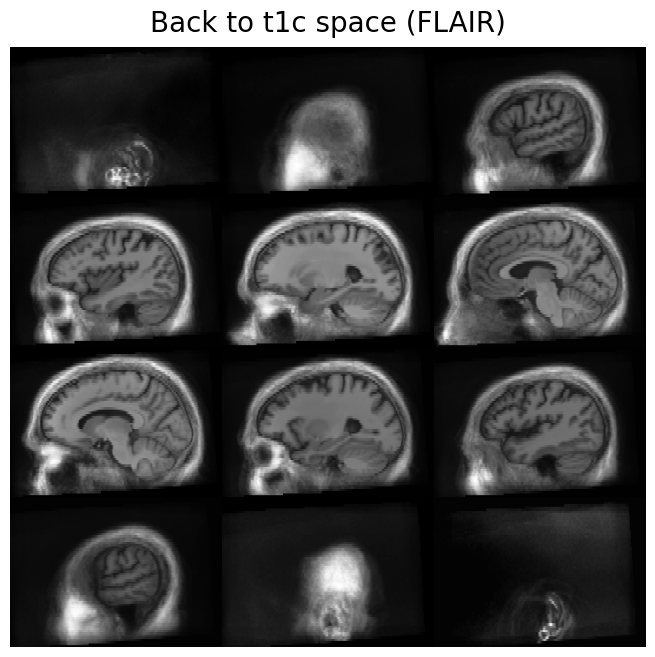

['-d', '3', '-i', '0x1e016530', '-o', '0x19422060', '-r', '0x1e04a760', '-n', 'linear', '-t', '[/home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat,1]']
Using single precision for computations.
Input scalar image: 0x1e016530
Reference image: 0x1e04a760
The composite transform comprises the following transforms (in order): 
  1. inverse of /home/marcelrosier/preprocessing/example/example_data/TCGA-DU-7294/ants_TCGA-DU-7294_brainles/co-registration/co__t1c__flair.mat (type = AffineTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x19422060


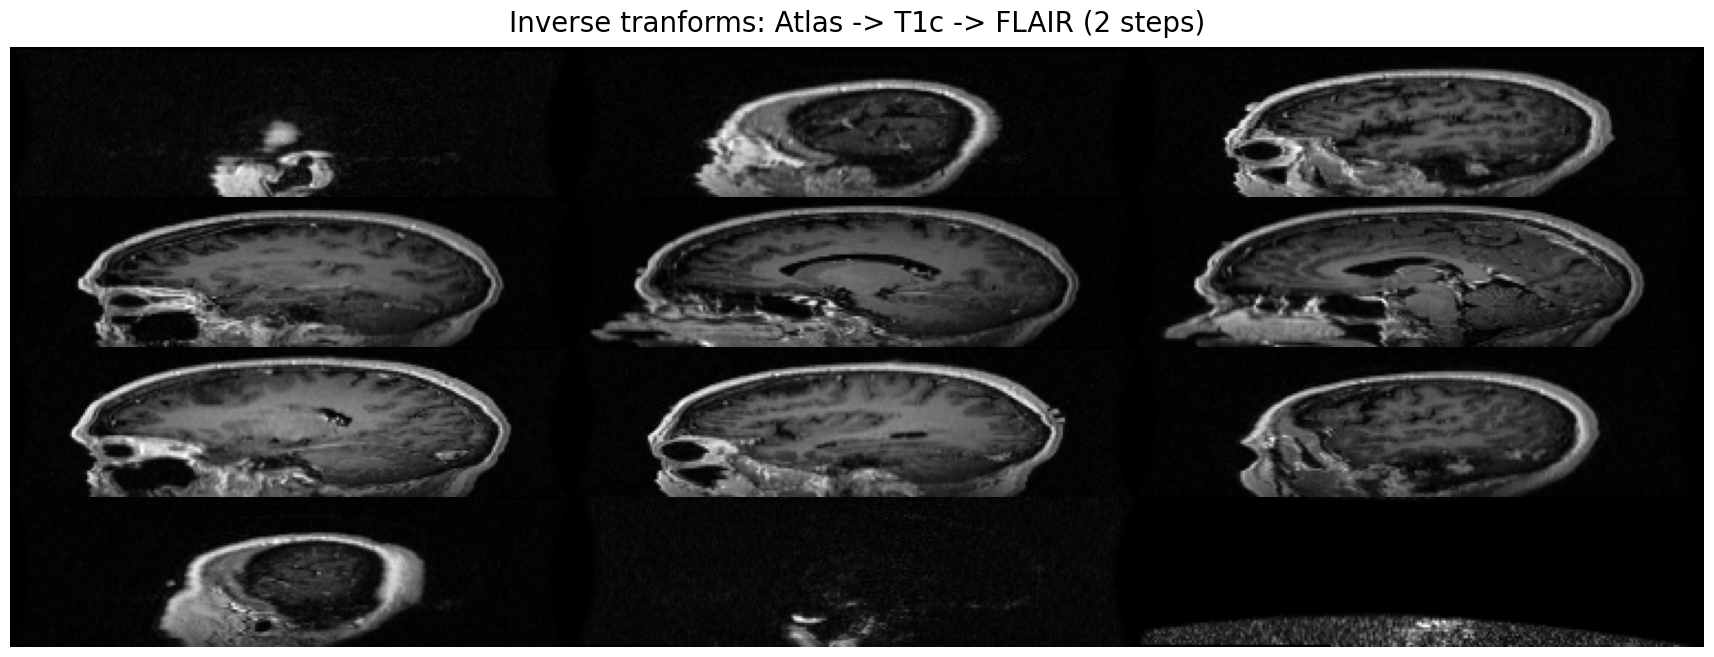

In [16]:
# single step registration
back_to_native_img_B = ants.apply_transforms(
    fixed=t1c_img,
    moving=atlas_img,
    transformlist=[
        str(atlas_reg_path),
    ],  # transforms are applied in inverse order!!!!
    whichtoinvert=[True],
    verbose=True,
)
ants.plot(back_to_native_img_B, title="Back to t1c space (FLAIR)")

# single step registration
back_to_native_img_B = ants.apply_transforms(
    fixed=flair_img,
    moving=t1c_img,
    transformlist=[
        str(t1c_flair_coreg_path),
    ],  # transforms are applied in inverse order!!!!
    whichtoinvert=[True],
    verbose=True,
)
ants.plot(back_to_native_img_B, title="Inverse tranforms: Atlas -> T1c -> FLAIR (2 steps)")